# Project Aim

In this project, i am going to be training a classifictaion model which deals with the prediction of what type of illness you have based on many symptoms.

In [1]:
# importing neccesary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

# Data Preparation and Cleaning

In [2]:
os.getcwd()

'C:\\Users\\Wells\\Desktop\\Model_deployment'

In [3]:
# reading the dataset

disease_df = pd.read_csv(r"C:\\Users\\Wells\\Desktop\Datasets\Machine learning datasets\disease_prediction\Training.csv")

disease_df2 = pd.read_csv(r"C:\\Users\\Wells\\Desktop\Datasets\Machine learning datasets\disease_prediction\Testing.csv")

In [4]:
df = pd.concat([disease_df, disease_df2], ignore_index=True)

In [5]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4959,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


In [6]:
# checking the basic information of the dataset

df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,0.0
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176,NaN
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [7]:
# checking for missing values

df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4962
Length: 134, dtype: int64

Our dataset is prepared for modelling and analysis

In [8]:
# performing a train-test-split on the data to get the training, validation and test data

from sklearn.model_selection import train_test_split

In [9]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

In [11]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(3175, 134)
(993, 134)
(794, 134)


**Identifying Input and Target columns**

In [12]:
input_cols = train_df.columns[:-2]
target_cols = 'prognosis'

In [13]:
train_input = train_df[input_cols]
train_target = train_df[target_cols]
val_input = val_df[input_cols]
val_target = val_df[target_cols]
test_input = test_df[input_cols]
test_target = test_df[target_cols]

In [47]:
train_input.shape

(3175, 132)

# Ridge Classifier Model

In [14]:
from sklearn.linear_model import RidgeClassifier

In [15]:
?RidgeClassifier

In [16]:
model = RidgeClassifier(random_state=42)

In [17]:
model.fit(train_input, train_target)

RidgeClassifier(random_state=42)

**train accuracy**

In [18]:
model.score(train_input, train_target)

0.9984251968503937

**val accuracy**

In [19]:
model.score(val_input, val_target)

0.9987405541561712

**test accuracy**

In [20]:
model.score(test_input, test_target)

0.998992950654582

**HYPERPARAMETER TUNING**

In [21]:
# defining a function to test parameters

def test_params(**params):
    model = RidgeClassifier(random_state=42, **params)
    model.fit(train_input, train_target)
    train_acc = model.score(train_input, train_target)
    val_acc = model.score(val_input, val_target)
    test_acc = model.score(test_input, test_target)
    return {'train accuracy': train_acc, 'val accuracy': val_acc, 'test accuracy': test_acc}

In [22]:
test_params(alpha=4)

{'train accuracy': 0.9996850393700787,
 'val accuracy': 1.0,
 'test accuracy': 1.0}

# **Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
?DecisionTreeClassifier

In [25]:
model_2 = DecisionTreeClassifier(random_state=42)

In [26]:
model_2.fit(train_input, train_target)

DecisionTreeClassifier(random_state=42)

**train accuracy**

In [27]:
model_2.score(train_input, train_target)

1.0

**validation accuracy**

In [28]:
model_2.score(val_input, val_target)

1.0

**test accuracy**

In [29]:
model_2.score(test_input, test_target)

1.0

In [30]:
model_2.tree_.max_depth

54

**HYPERPARAMETER TUNING**

In [31]:
# defining a function to test parameters

def test_params(**params):
    model_2 = DecisionTreeClassifier(random_state=42, **params)
    model_2.fit(train_input, train_target)
    train_acc = model_2.score(train_input, train_target)
    val_acc = model_2.score(val_input, val_target)
    test_acc = model_2.score(test_input, test_target)
    return {'train accuracy': train_acc, 'val accuracy': val_acc, 'test accuracy': test_acc}

In [32]:
test_params(max_features=30, max_depth=41)

{'train accuracy': 0.9977952755905511,
 'val accuracy': 0.9911838790931989,
 'test accuracy': 0.9899295065458208}

**Feature Importance**

In [33]:
importances = list(model_2.feature_importances_)

In [34]:
importance_df = pd.DataFrame({
    'feature': train_input.columns,
    'importance': model_2.feature_importances_
})

In [35]:
imp = importance_df.sort_values('importance', ascending=False).head(20)
imp

,feature,importance
56,chest_pain,0.041057
62,irritation_in_anus,0.027951
120,palpitations,0.027061
71,enlarged_thyroid,0.026744
98,altered_sensorium,0.026372
112,receiving_unsterile_injections,0.026111
43,yellowing_of_eyes,0.026032
113,coma,0.025796
41,mild_fever,0.025473
86,unsteadiness,0.025387


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


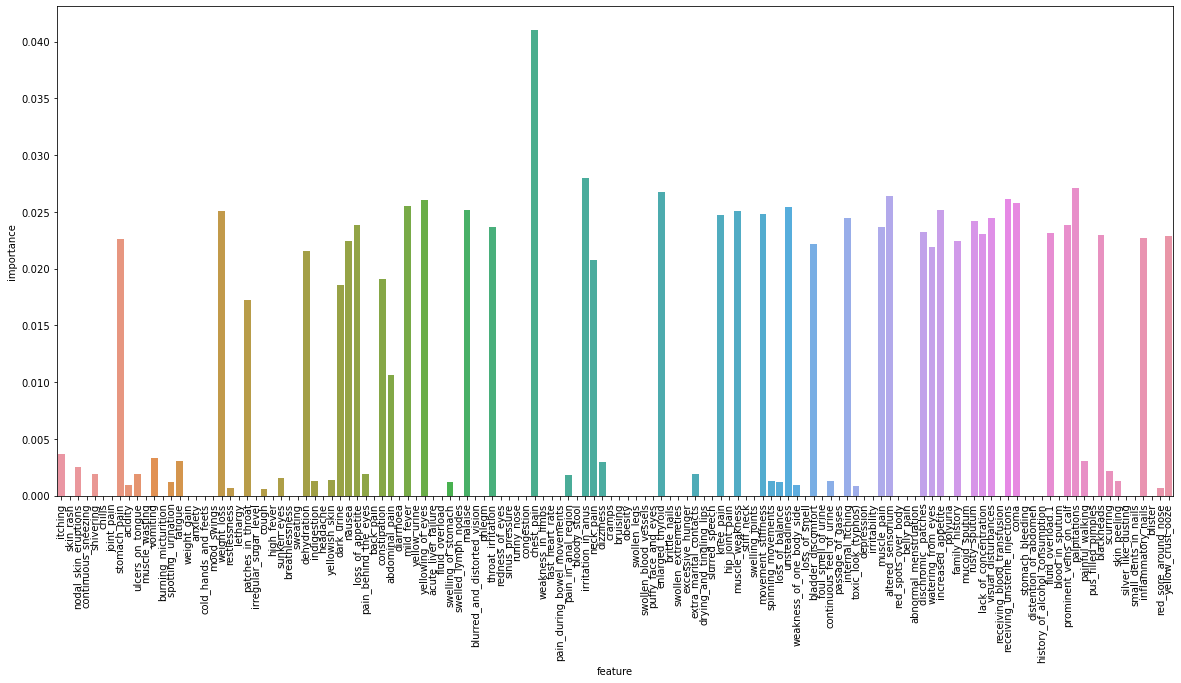

In [36]:
plt.figure(figsize=(20, 9))
plt.xticks(rotation = 90)
sns.barplot('feature', 'importance', data=importance_df);

In [38]:
from joblib import dump, load

In [49]:
dump(model_2, 'disease_pred.joblib')

['disease_pred.joblib']